In [29]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import layers

In [37]:
# Reload and fix dataset pipeline (copy/paste this)
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

def normalize_img(image, label):
    return tf.cast(image, tf.float32) / 255.0, label

ds_train = ds_train.map(normalize_img)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(1000)
ds_train = ds_train.batch(32)              # ← VERY IMPORTANT
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

ds_test = ds_test.map(normalize_img).batch(32).prefetch(tf.data.AUTOTUNE)


In [31]:
for images, labels in ds_train.take(1):
  print("Images Shape", images.shape)
  print("Labels Shape", labels.shape)


Images Shape (28, 28, 1)
Labels Shape ()


Image batch shape: (32, 28, 28, 1)
Label batch shape: (32,)


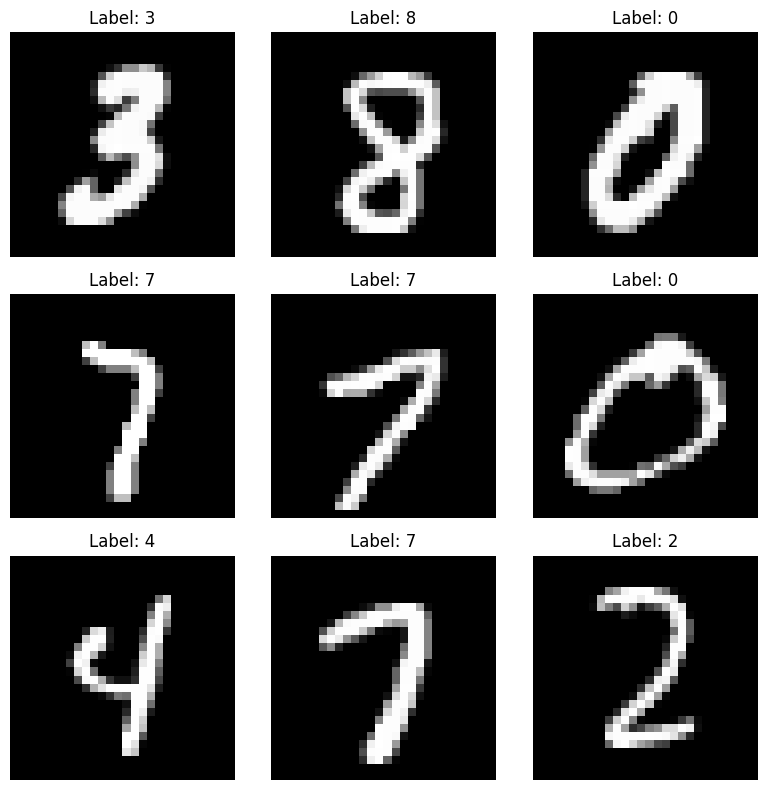

In [38]:
for images, labels in ds_train.take(1):
    break

print("Image batch shape:", images.shape)
print("Label batch shape:", labels.shape)

images = images.numpy()
labels = labels.numpy()

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(f"Label: {int(labels[i])}")
    plt.axis("off")
plt.tight_layout()
plt.show()


In [39]:
model= keras.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(18, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10)

])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [42]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  # ✅ this is correct
    metrics=['accuracy']
)


In [44]:
history = model.fit(
    ds_train,
    validation_data=ds_test,
    epochs=5
)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.7217 - loss: 0.9027 - val_accuracy: 0.9204 - val_loss: 0.2830
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8710 - loss: 0.4124 - val_accuracy: 0.9295 - val_loss: 0.2369
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8888 - loss: 0.3620 - val_accuracy: 0.9345 - val_loss: 0.2201
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8952 - loss: 0.3403 - val_accuracy: 0.9366 - val_loss: 0.2152
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8972 - loss: 0.3266 - val_accuracy: 0.9393 - val_loss: 0.2072


In [45]:
test_loss, test_accuracy = model.evaluate(ds_test)
print(f'Test Accuracy:{test_accuracy}:.4f')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9399 - loss: 0.2012
Test Accuracy:0.939300000667572:.4f


In [46]:
for images, labels in ds_test.take(1):
    predictions = model.predict(images)
    break


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


In [47]:
import numpy as np
probabilities = tf.nn.softmax(predictions)
predicted_labels = np.argmax(probabilities, axis=1)


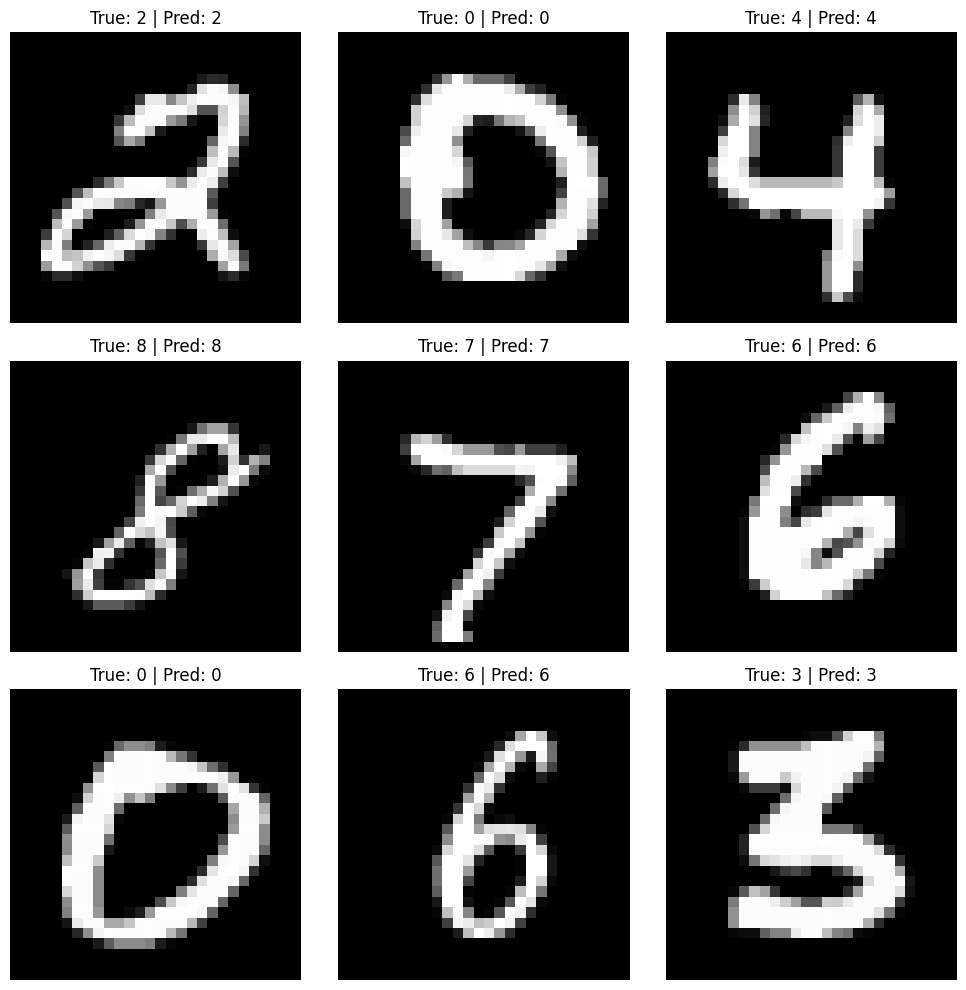

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().squeeze(), cmap='gray')
    true = int(labels[i].numpy())
    pred = predicted_labels[i]
    plt.title(f"True: {true} | Pred: {pred}")
    plt.axis("off")
plt.tight_layout()
plt.show()


In [49]:
model.save("mnist_classifier.keras")
